# Toward the Eshelby's elliptical inhomogeneity problem: a composite disk

We consider a composite disk in 2d elasticity.

We consider a circular inclusion (radius: $a$, Lamé coefficients: $\lambda_{\mathrm i}$, $\mu_{\mathrm i}$) embedded in a homogeneous, circular matrix (radius: $R$, Lamé coefficients: $\lambda_{\mathrm m}$, $\mu_{\mathrm m}$). Both disks are concentric.

The boundary of the matrix is subjected to the prescribed displacement

\begin{equation*}
u_x = y\quad\text{and}\quad u_y=x.
\end{equation*}

These boundary conditions are known as “kinematically uniform boundary conditions”, the general form of which is

\begin{equation*}
\mathbf{u} = \overline{\boldsymbol\varepsilon}\cdot\mathbf{x},
\end{equation*}

where the *macroscopic strain* $\overline{\boldsymbol\varepsilon}$ is in the present case a unit shear

\begin{equation*}
\overline{\boldsymbol\varepsilon}=\mathbf{e}_x\otimes\mathbf{e}_y+\mathbf{e}_y\otimes\mathbf{e}_x.
\end{equation*}



## Homework

Write a code that solve the problem for a matrix with Young modulus and Poisson ratio $E_m = 1.0$,
$\nu_m = 0.3$ and a inclusion with poisson ratio $\nu_i = 0.3$ and $E_i=10E_m$. The loading is given by the displacement imposed on the external boundary of the matrix:
\begin{equation*}
u_x = y\quad\text{and}\quad u_y=x.
\end{equation*}
Plot the displaced configuration of the structure and the Von Mises stress.
You can compare with the anlytical solution provided in the notebook `Circular_inhomogeneity-shear.ipynb`.

*Hint:* You find below an help for starting, with the mesh and the subdomains. You can get inspiration form the examples treated in class and from the fenics tutorial for the rest of the code. 


### Help: Mesh with subdomains
We give below the code to produce the mesh of the domain, which is a disk containing a concentring inclusion. 

*Comments*
- We use the library [mshr](https://bitbucket.org/fenics-project/mshr/wiki/Home) to generate the mesh. This is not optimal, but practical. More complex meshes can be generated with [gmsh](https://gmsh.info) and imported (not needed here). 
- The discretization of the geometric primitives (ellipse, circle) are defined in terms of number of segments. As we want to control the *size* of the elements, we need to compute the perimeter of the entities first. We use `mshr.Ellipse`, because we will change the shape in a second step of the project
- We use `Subdomains` to deal with multiple materials. Details about this point can be found in Section 4.3 of the [fenics tutorial](https://fenicsproject.org/pub/tutorial/pdf/fenics-tutorial-vol1.pdf).

In [1]:
import dolfin
import matplotlib.pyplot as plt
import mshr
import numpy as np
import scipy.special
plt.rcParams["figure.figsize"] = (12, 8)

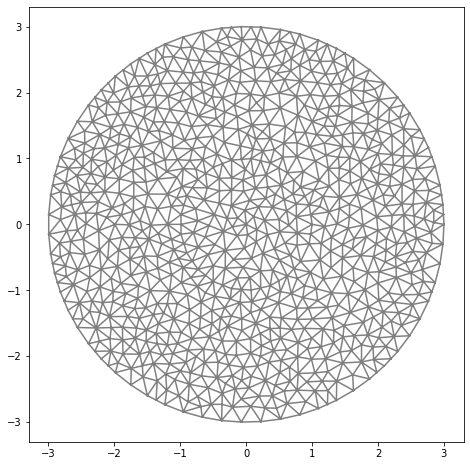

In [2]:
MATRIX_ID = 1
INHOMOGENEITY_ID = 2
a = 1.0 # Horizontal radius of ellipse
b = a # Vertical radius of ellipse 
gamma = 3.0 # The dimensionless R/a ratio
R = gamma*a # Radius of domain
h = .3*a # Size of elements

circle_perimeter = 2*np.pi*R
e_sqr = 1.-min(a, b)/max(a, b)
ellipse_perimeter = 4*a*scipy.special.ellipe(e_sqr)
origin = dolfin.Point(0., 0.)
Omega_i = mshr.Ellipse(origin, a, b,
                       int(np.ceil(ellipse_perimeter/h)))
Omega = mshr.Circle(origin, R,
                    int(np.ceil(circle_perimeter/h)))
Omega.set_subdomain(MATRIX_ID, Omega-Omega_i)
Omega.set_subdomain(INHOMOGENEITY_ID, Omega_i)
mesh = mshr.generate_mesh(Omega, resolution=2*R/h)
dolfin.plot(mesh)

We provide also the `subdomain_data` and measures incorporating them, that will be useful to identify the parts of the domains (see FEniCS tutotiral sec.4.3)

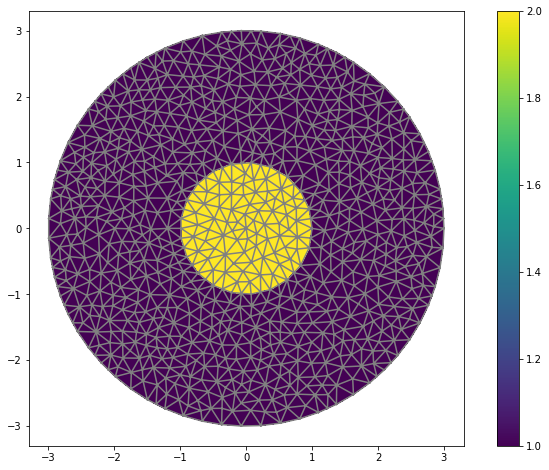

In [3]:
subdomain_data = dolfin.MeshFunction("size_t", mesh, dim=mesh.geometric_dimension(), value=mesh.domains())
plt.colorbar(dolfin.plot(subdomain_data))
dolfin.plot(mesh)
dx = dolfin.Measure("dx",
                    domain=mesh,
                    subdomain_data=subdomain_data)
ds = dolfin.Measure("ds", domain=mesh)

For example you can get the areas of each region as folllow:

In [4]:
keys = ["everywhere", INHOMOGENEITY_ID, MATRIX_ID]
areas = {key: dolfin.assemble(dolfin.Constant(1.)*dx(key)) for key in keys}
areas
for region, area in areas.items():  
        print("The area of the region {} is {:04.2f}".format(region, area))

The area of the region everywhere is 28.23
The area of the region 2 is 3.09
The area of the region 1 is 25.13
